## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df =pd.read_csv('QueryResults.csv',names=["DATE","TAG",'POSTS']).drop(0)

In [ ]:
df

,DATE,TAG,POSTS
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0
5,2008-08-01 00:00:00,python,124.0
...,...,...,...
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()


,DATE,TAG,POSTS
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0
5,2008-08-01 00:00:00,python,124.0


In [ ]:
df.tail()

,DATE,TAG,POSTS
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0
1991,2020-07-01 00:00:00,swift,3607.0


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape

(1992, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

,0
DATE,1992
TAG,1992
POSTS,1991


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df[['TAG','POSTS']].groupby('TAG').sum().sort_values('POSTS',ascending=False)


,POSTS
TAG,
javascript,2056510.0
java,1696403.0
python,1496210.0
c#,1423530.0
php,1361988.0
c++,684210.0
r,356799.0
c,336042.0
swift,273055.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
df[['TAG','POSTS']].groupby('TAG').count().sort_values('POSTS',ascending=False)

,POSTS
TAG,
c#,145
assembly,144
c,144
c++,144
delphi,144
java,144
javascript,144
perl,144
php,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df['DATE'][1]


'2008-07-01 00:00:00'

In [ ]:
print(f"Date:{df.DATE[1]}")

Date:2008-07-01 00:00:00


In [4]:
type(df['DATE'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
print(pd.to_datetime(df.DATE[1]))
print(type(pd.to_datetime(df.DATE[1])))

2008-07-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [3]:
df["DATE"]=pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,javascript,162.0
4,2008-08-01,c,85.0
5,2008-08-01,python,124.0


## Data Manipulation



In [7]:
test_df=pd.DataFrame({'Age':['Young','Old','Young','Old'],'Actor':['Arnold','Jack','Vijay','Rajini'],'Power':[100,90,120,110]})
test_df

,Age,Actor,Power
0,Young,Arnold,100
1,Old,Jack,90
2,Young,Vijay,120
3,Old,Rajini,110


In [8]:
p_df=test_df.pivot(index='Age',columns='Actor',values='Power')
p_df

Actor,Arnold,Jack,Rajini,Vijay
Age,,,,
Old,NaN,90.0,110.0,NaN
Young,100.0,NaN,NaN,120.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [9]:
reshaped_df=df.pivot(index='DATE',columns='TAG',values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [ ]:
reshaped_df.shape

(145, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


,0
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [ ]:
reshaped_df.count()

,0
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


In [10]:
reshaped_df.fillna(0,inplace=True)

In [ ]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

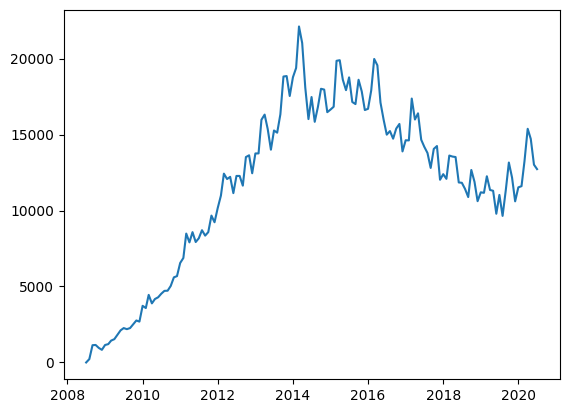

In [12]:
# plt.plot(reshaped_df['java'])
# plt.plot(reshaped_df.index,reshaped_df['java'])
plt.plot(reshaped_df.index,reshaped_df.java)

(0.0, 35000.0)

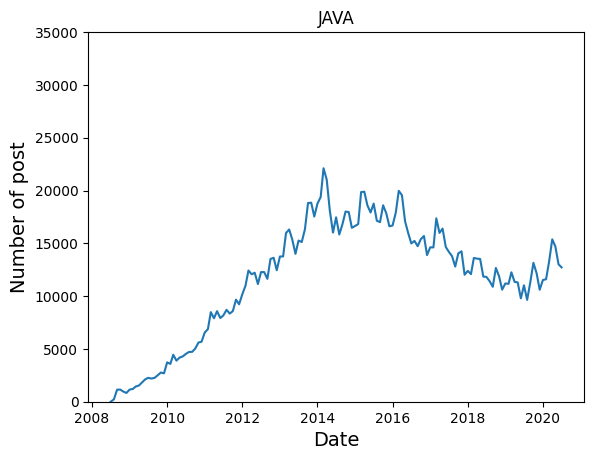

In [15]:
plt.plot(reshaped_df.index,reshaped_df.java)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of post', fontsize=14)
plt.title('JAVA')
plt.ylim(0,35000)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

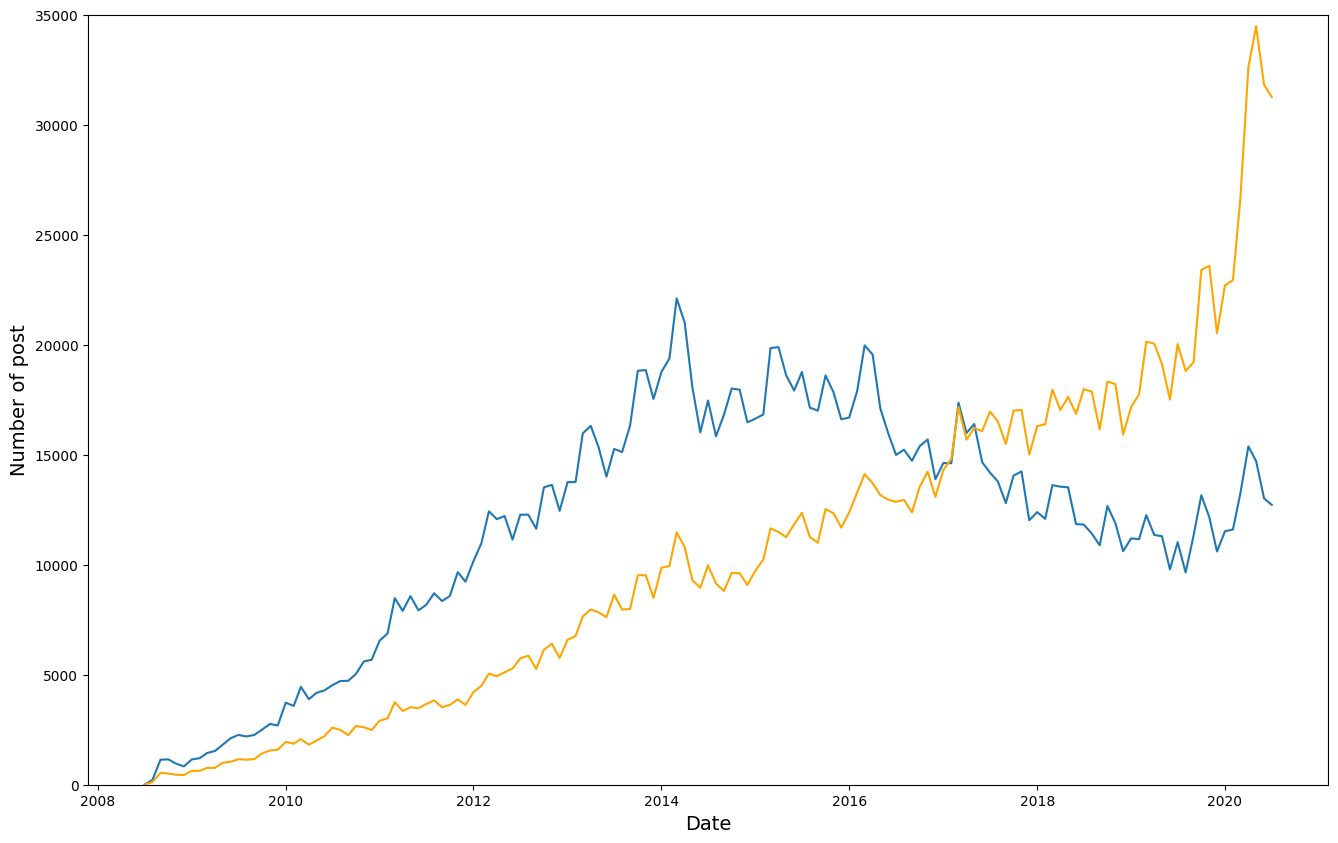

In [18]:
plt.figure(figsize=(16,10))
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of post', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df.java)
plt.plot(reshaped_df.index,reshaped_df.python,color='orange')

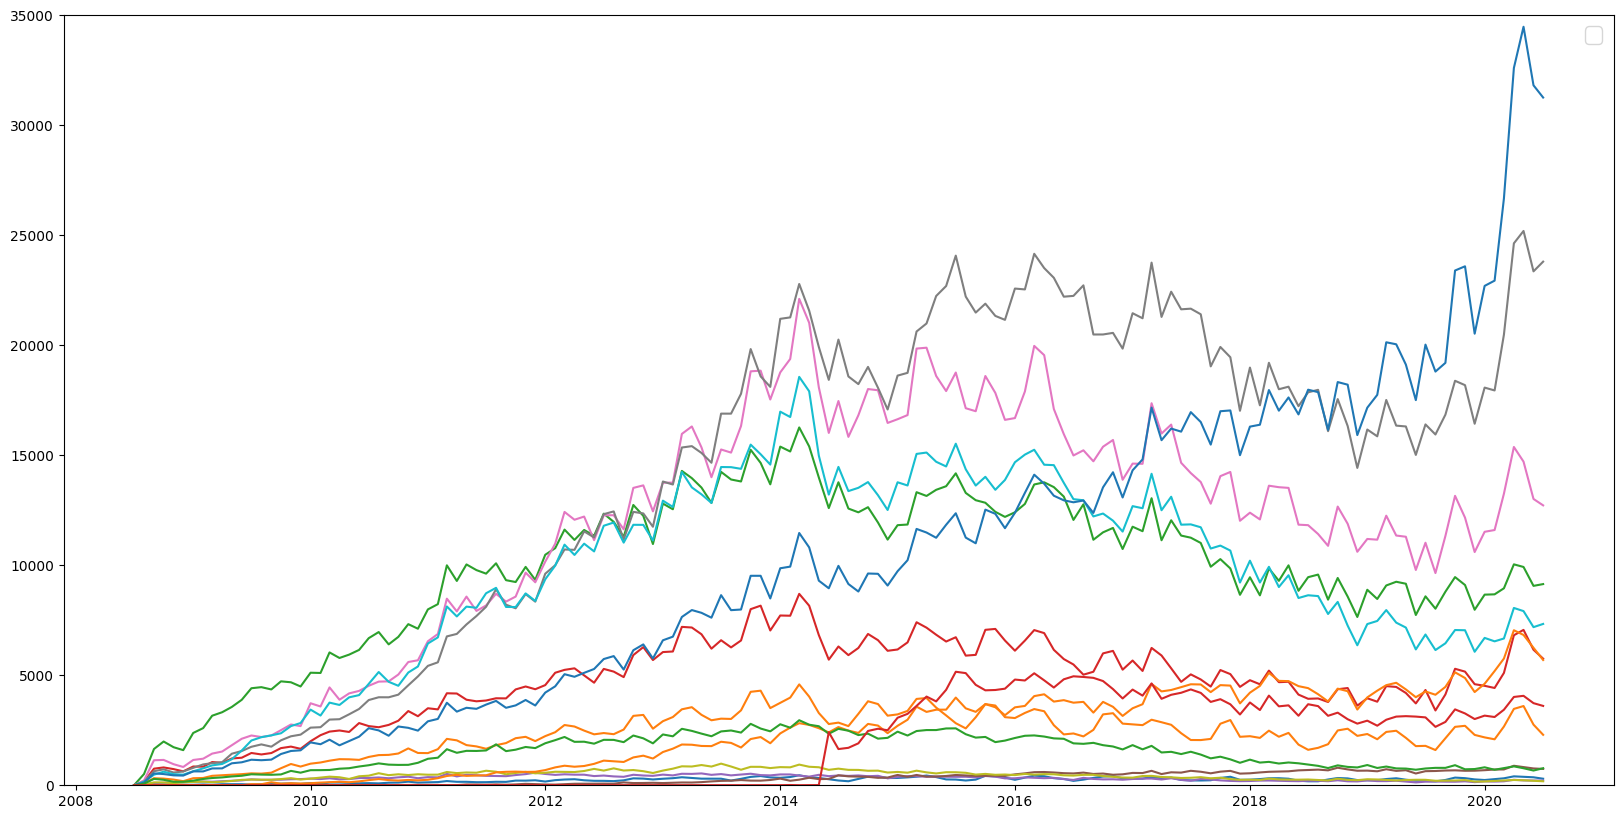

In [28]:
plt.figure(figsize=(20,10))
plt.ylim(0,35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index,reshaped_df[column])



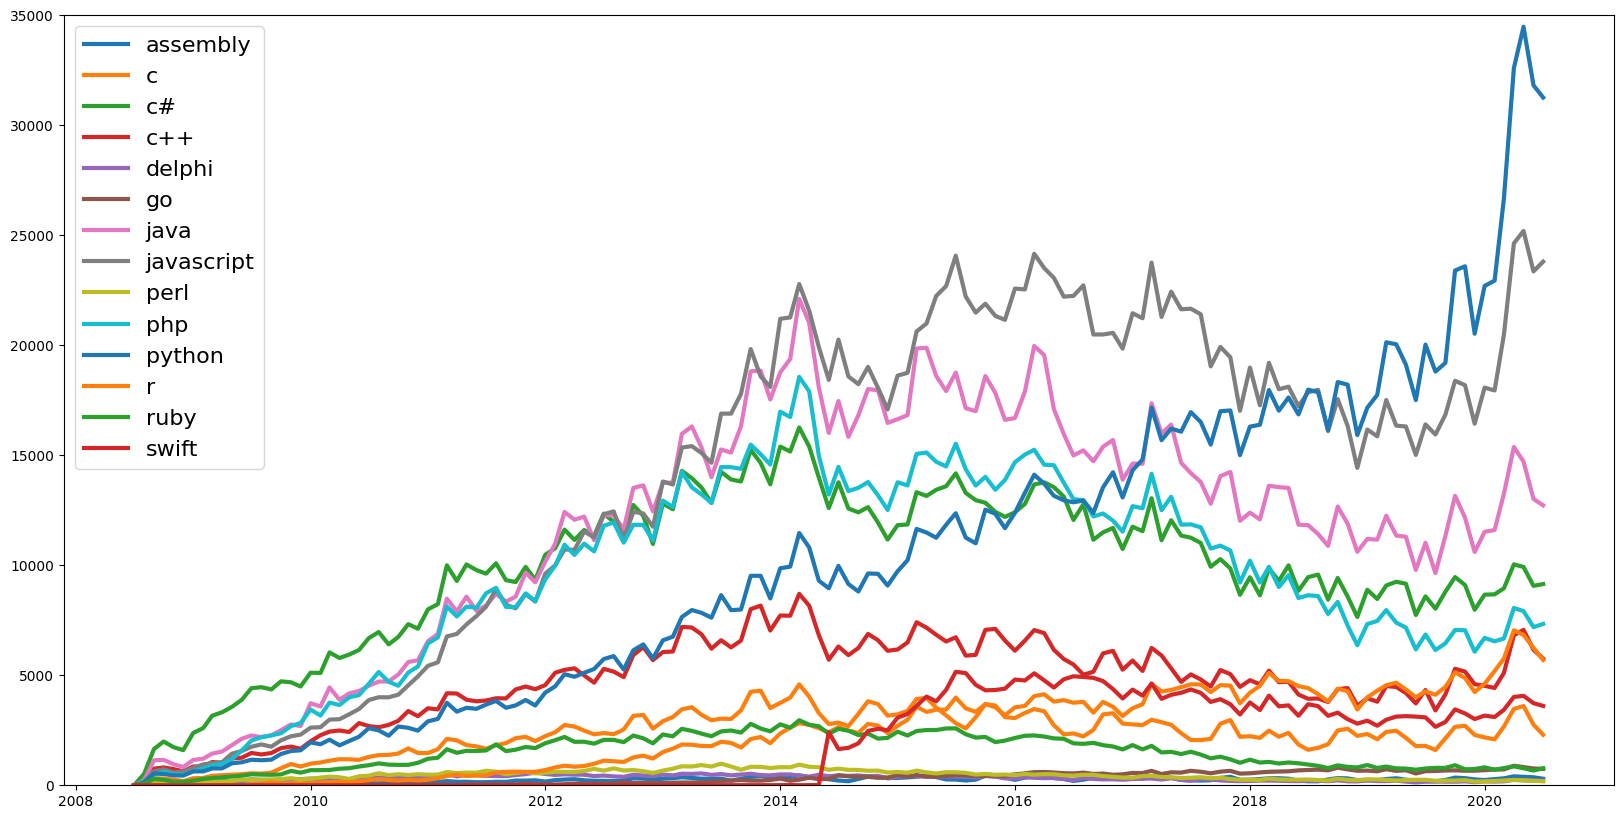

In [29]:
plt.figure(figsize=(20,10))
plt.ylim(0,35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index,reshaped_df[column],linewidth=3,label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

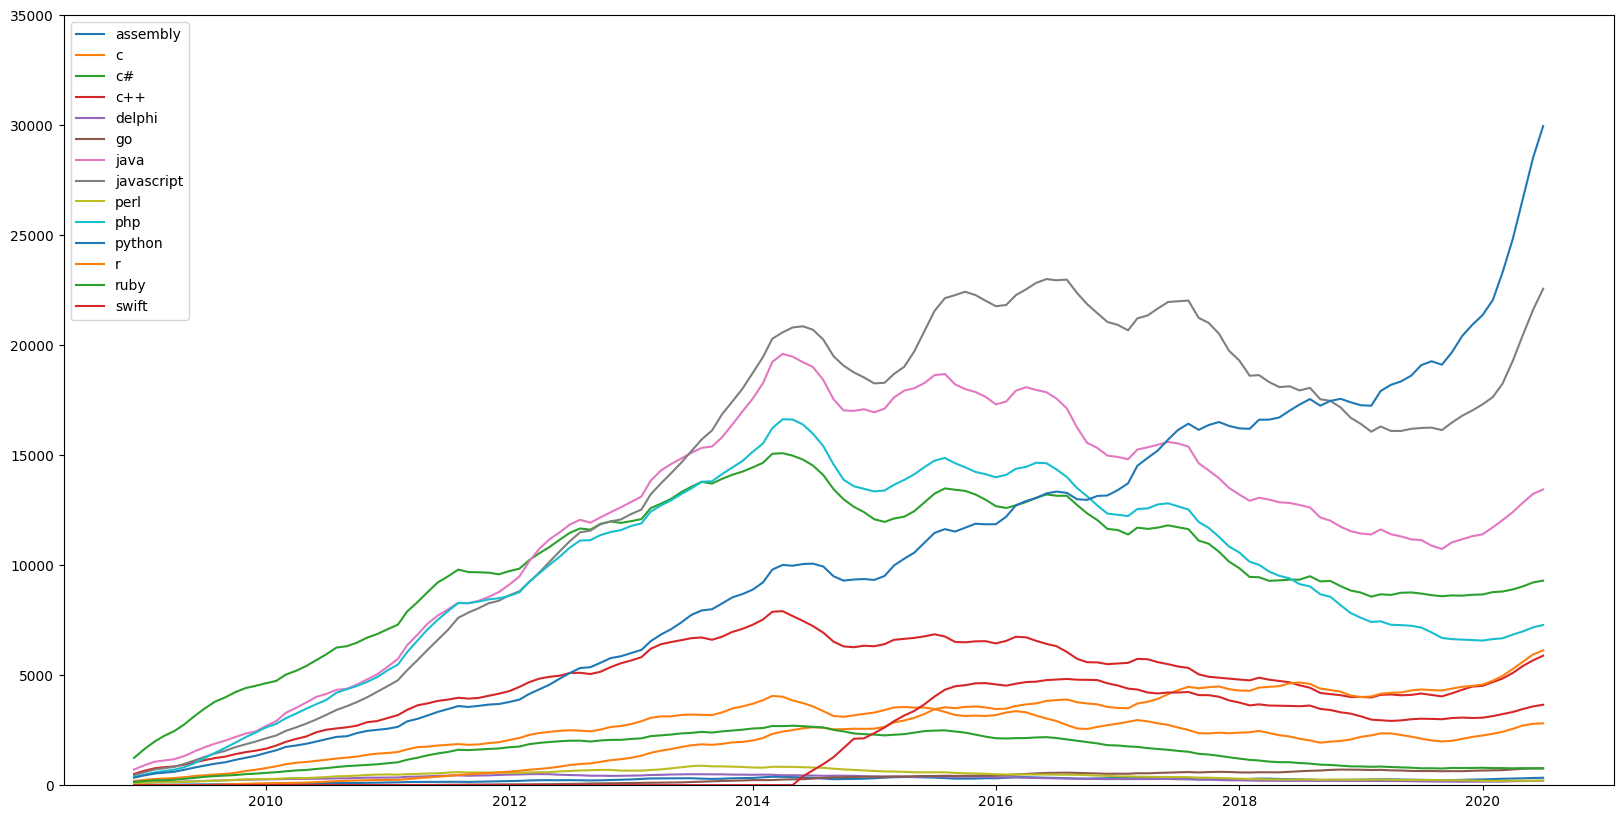

In [39]:

plt.figure(figsize=(20,10))
plt.ylim(0,35000)

rolling_df=reshaped_df.rolling(window=6).mean()

for column in rolling_df.columns:
  plt.plot(rolling_df.index,rolling_df[column],label=rolling_df[column].name)
plt.legend()

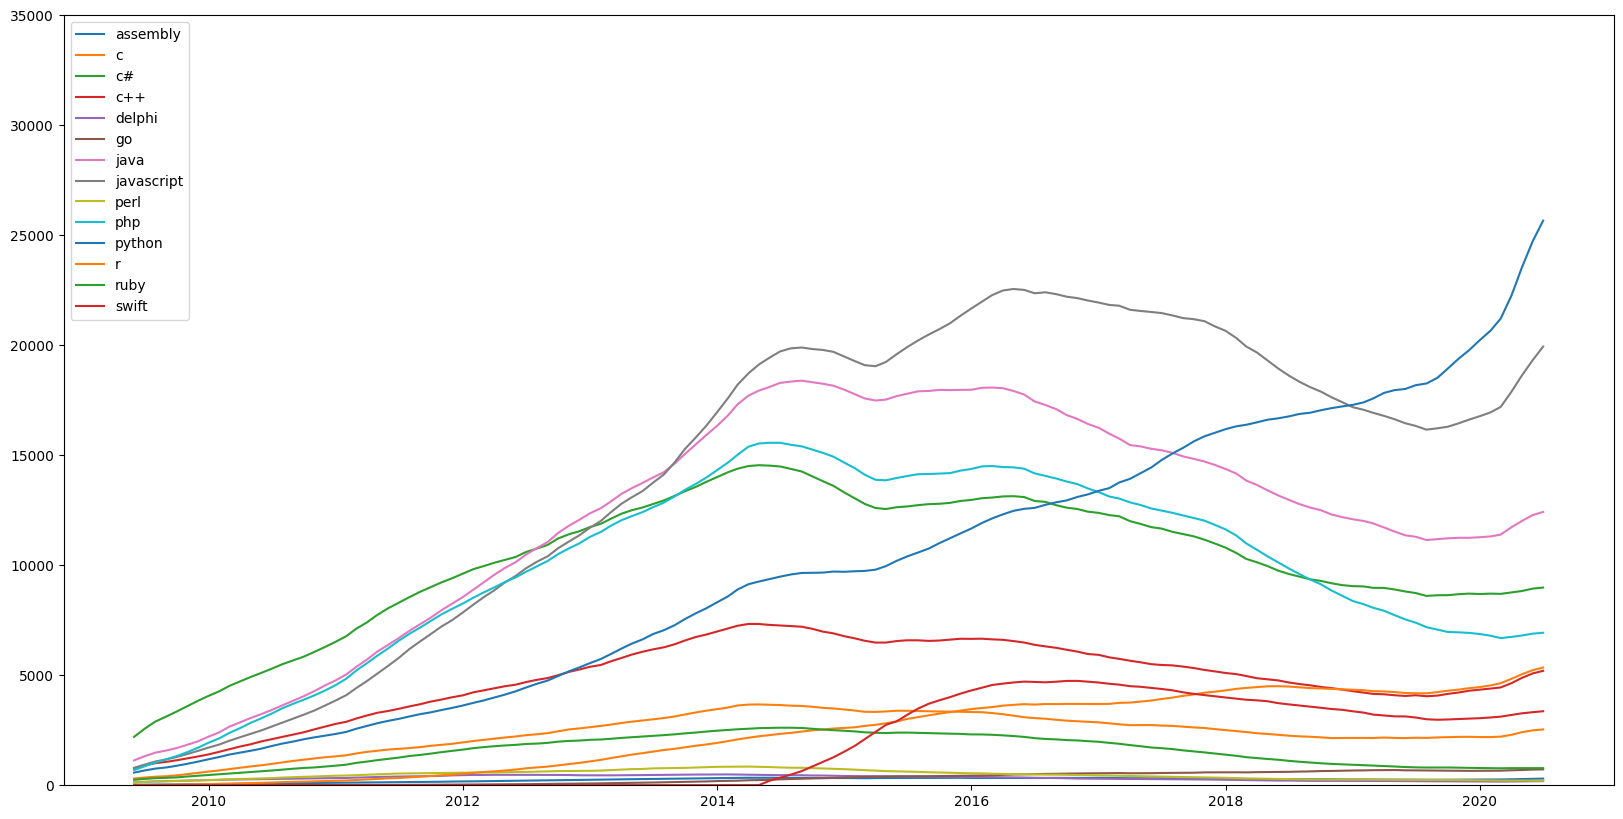

In [34]:

plt.figure(figsize=(20,10))
plt.ylim(0,35000)

rolling_df=reshaped_df.rolling(window=12).mean()

for column in rolling_df.columns:
  plt.plot(rolling_df.index,rolling_df[column],label=rolling_df[column].name)
plt.legend()